In [1]:
!pip install torch torchvision
!pip install segmentation-models-pytorch
!pip install pycocotools

  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 39.3 MB/s eta 0:00:00
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16427 sha256=f79ff878ec3d78ee7958e7d316b4081ea7d8306af2cda1025bd6954625da7eff
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60945 sha256=a799c3afae4b7f70b53a72da4040fff6ad696e87464c157e68b8b48bc96a0d4a
  Stored in directory: /root/.cache/pip/wheels/35/cb/a5/8f534c60142835bfc889f9a482e4a67e0b817032d9c6883b64
Successfully built efficien

In [2]:
import json

# Path to annotations JSON file
annotations_file = '/kaggle/input/seaturtleid2022/turtles-data/data/annotations.json'

# Load the JSON data
with open(annotations_file, 'r') as f:
    annotations = json.load(f)

# Step 1: Check the top-level keys
print("Top-level keys:", annotations.keys())

# Step 2: Inspect the first few entries in the 'annotations' section
print("Number of annotations:", len(annotations['annotations']))
print("First annotation entry:", json.dumps(annotations['annotations'][0], indent=4))

# Inspect the first few entries in the 'images' section
print("First images entry:", json.dumps(annotations['images'][0], indent=4))

Top-level keys: dict_keys(['licenses', 'info', 'categories', 'images', 'annotations'])
Number of annotations: 38414
First annotation entry: {
    "id": 1,
    "image_id": 1,
    "category_id": 3,
    "segmentation": {
        "counts": [
            858927,
            7,
            1322,
            23,
            1306,
            34,
            1298,
            36,
            1296,
            39,
            1292,
            42,
            1291,
            43,
            1289,
            45,
            1287,
            47,
            1285,
            48,
            1285,
            49,
            1283,
            51,
            1281,
            53,
            1280,
            54,
            1278,
            56,
            1277,
            56,
            1277,
            57,
            1275,
            58,
            1274,
            60,
            1273,
            61,
            1272,
            61,
            1272,
            62,
            1

In [3]:
from collections import Counter

# Access the list of annotation entries
annotation_entries = annotations['annotations']  # Now this should be a list of dictionaries

# Extract the category_id for each annotation
category_ids = [annotation['category_id'] for annotation in annotation_entries]

# Count the occurrences of each category_id
category_counts = Counter(category_ids)

# Display the result
print("Category ID Counts:")
for category_id, count in category_counts.items():
    print(f"Category ID {category_id}: {count} annotations")

Category ID Counts:
Category ID 3: 8526 annotations
Category ID 2: 21087 annotations
Category ID 1: 8801 annotations


In [4]:
# Assuming annotations is the main dictionary containing all dataset information
category_mapping = {category['id']: category['name'] for category in annotations['categories']}

# Display the category mapping
print("Category ID Mapping:")
for category_id, name in category_mapping.items():
    print(f"Category ID {category_id}: {name}")

Category ID Mapping:
Category ID 1: turtle
Category ID 2: flipper
Category ID 3: head


In [5]:
import os

# Base directory where the images are stored
image_base_dir = '/kaggle/input/seaturtleid2022/turtles-data/data/images/'

# Load all image paths (recursive)
image_paths = []
for root, dirs, files in os.walk(image_base_dir):
    for file in files:
        if file.endswith('.jpg') or file.endswith('.png') or file.endswith('.JPG') or file.endswith('.jpeg'):  # Adjust file formats as needed
            image_paths.append(os.path.join(root, file))

print(f"Found {len(image_paths)} images.")
print(image_paths[0])

Found 8729 images.
/kaggle/input/seaturtleid2022/turtles-data/data/images/t358/wZHHIHzyme.JPG


In [6]:
# Create a mapping from image_id to file_name from the 'images' section
image_id_to_filename = {}
for image_info in annotations['images']:
    image_id = image_info['id']           # Image ID in 'images' section
    file_name = image_info['file_name']   # Corresponding file name
    image_id_to_filename[image_id] = file_name

# Create a mapping from file names to lists of annotations using image_id
annotations_dict = {}
for annotation in annotations['annotations']:
    image_id = annotation['image_id']  # Get image_id from the annotation
    image_file_name = image_id_to_filename[image_id]  # Look up file name using image_id

    # Initialize a list if the image has no annotations yet
    if image_file_name not in annotations_dict:
        annotations_dict[image_file_name] = []

    # Append each annotation to the corresponding image’s list of annotations
    annotations_dict[image_file_name].append(annotation)

# Print some sample data
print(f"Number of unique images with annotations: {len(annotations_dict)}")
print(f"Example annotations for {list(annotations_dict.keys())[0]}:")
for ann in annotations_dict[list(annotations_dict.keys())[0]]:
    print(ann)

# Find images that have no annotations
images_without_annotations = [file_name for file_name in image_id_to_filename.values() if file_name not in annotations_dict]

# Print the filenames of images without annotations
print(f"\nNumber of images without annotations: {len(images_without_annotations)}")
print("Filenames of images without annotations:")
for file_name in images_without_annotations:
    print(file_name)

Number of unique images with annotations: 8726
Example annotations for images/t001/CAluWEgwPX.JPG:
{'id': 1, 'image_id': 1, 'category_id': 3, 'segmentation': {'counts': [858927, 7, 1322, 23, 1306, 34, 1298, 36, 1296, 39, 1292, 42, 1291, 43, 1289, 45, 1287, 47, 1285, 48, 1285, 49, 1283, 51, 1281, 53, 1280, 54, 1278, 56, 1277, 56, 1277, 57, 1275, 58, 1274, 60, 1273, 61, 1272, 61, 1272, 62, 1270, 63, 1269, 64, 1268, 65, 1268, 65, 1268, 66, 1267, 67, 1266, 67, 1265, 68, 1264, 69, 1263, 70, 1263, 70, 1263, 70, 1263, 70, 1263, 70, 1263, 70, 1262, 71, 1261, 72, 1261, 72, 1261, 72, 1261, 72, 1261, 72, 1261, 72, 1261, 72, 1260, 73, 1260, 73, 1260, 73, 1259, 74, 1258, 75, 1258, 74, 1259, 73, 1260, 72, 1261, 71, 1262, 69, 1263, 69, 1264, 68, 1265, 66, 1266, 64, 1269, 63, 1269, 61, 1272, 59, 1274, 58, 1275, 55, 1278, 52, 1281, 15, 8, 25, 1285, 12, 16, 17, 1289, 9, 24, 3, 1297, 7, 1327, 4, 1715124], 'size': [1333, 2000]}, 'area': 4065.0, 'bbox': [644.0, 441.0, 70.0, 78.0], 'iscrowd': 1, 'attributes

Display each of the images without annotations.

loading annotations into memory...
Done (t=6.61s)
creating index...
index created!
Number of annotations for image images/t221/wXxaQqJIQN.JPG = 0


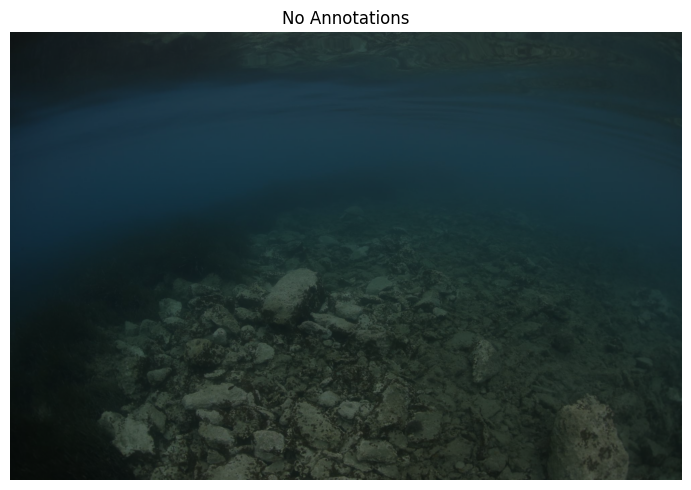

Number of annotations for image images/t522/xulOLaCSKj.JPG = 0


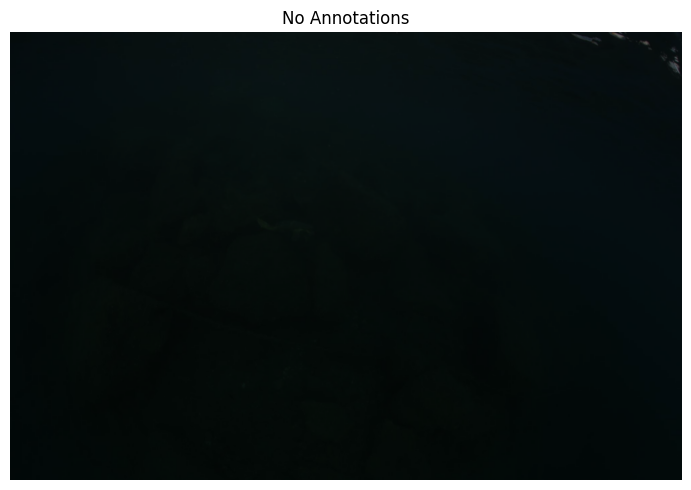

Number of annotations for image images/t500/YFCPGMJkJg.jpeg = 0


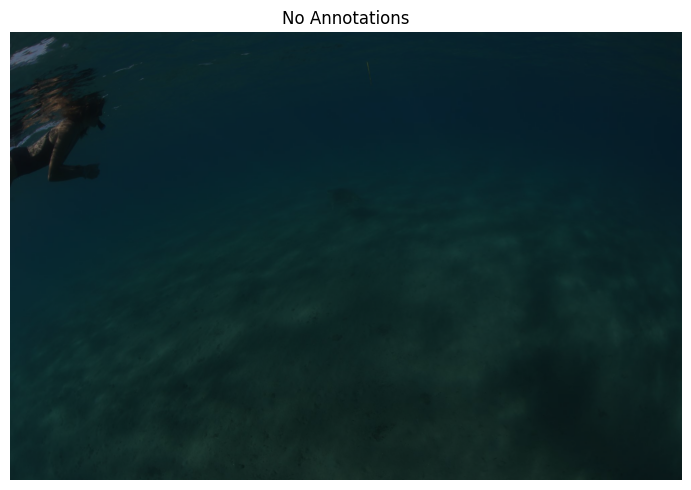

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from pycocotools.coco import COCO
import os

# Define file paths
annotations_file = '/kaggle/input/seaturtleid2022/turtles-data/data/annotations.json'
image_base_dir = '/kaggle/input/seaturtleid2022/turtles-data/data/'

# Initialize COCO API
coco = COCO(annotations_file)

# List of filenames with no annotations
image_filenames_without_annotations = [
    'images/t221/wXxaQqJIQN.JPG',
    'images/t522/xulOLaCSKj.JPG',
    'images/t500/YFCPGMJkJg.jpeg'
]

# Loop through each image with no annotations
for filename in image_filenames_without_annotations:
    # Find the image ID based on the filename
    image_id = None
    for img in coco.imgs.values():
        if img['file_name'] == filename:
            image_id = img['id']
            break

    if image_id is None:
        print(f"Image {filename} not found in COCO dataset.")
        continue

    # Load and display the original image
    image_path = os.path.join(image_base_dir, filename)
    image = np.array(Image.open(image_path))

    # Retrieve all annotation IDs for the given image (should be empty)
    anns_ids = coco.getAnnIds(imgIds=image_id, iscrowd=None)
    anns = coco.loadAnns(anns_ids)
    
    print(f'Number of annotations for image {filename} = {len(anns)}')

    # Determine number of subplots
    if len(anns) > 0:
        num_plots = len(anns) + 1
    else:
        num_plots = 1

    fig, axs = plt.subplots(1, num_plots, figsize=(15, 5))

    # Ensure axs is always an array for consistency
    if num_plots == 1:
        axs = [axs]  # Make axs a list if it's a single plot

    axs[0].imshow(image)
    axs[0].set_title("Original Image")
    axs[0].axis("off")

    # If there are no annotations, show a blank mask with a message
    if len(anns) == 0:
        blank_mask = np.zeros_like(image)  # Create a blank mask with the same shape as the image
        axs[0].imshow(blank_mask, alpha=0.5)  # Overlay a blank mask for clarity
        axs[0].set_title("No Annotations")
    else:
        # Loop over each annotation and visualize it separately
        for i, ann in enumerate(anns):
            # Generate the binary mask for the current annotation
            mask = coco.annToMask(ann)

            # Create a copy of the original image and apply the mask
            masked_image = image.copy()
            masked_image[mask == 0] = 0  # Set all non-annotation areas to black

            # Display each annotated region with the corresponding category name
            axs[i + 1].imshow(masked_image)
            category_name = coco.loadCats(ann['category_id'])[0]['name']
            axs[i + 1].set_title(f"Category: {category_name}")
            axs[i + 1].axis("off")

    plt.tight_layout()
    plt.show()

View an image with all of its annotations (note that turtle annotation covers entire turtle, but we will need to change the corresponding mask to just cover the carapace (body)).

loading annotations into memory...
Done (t=6.29s)
creating index...
index created!


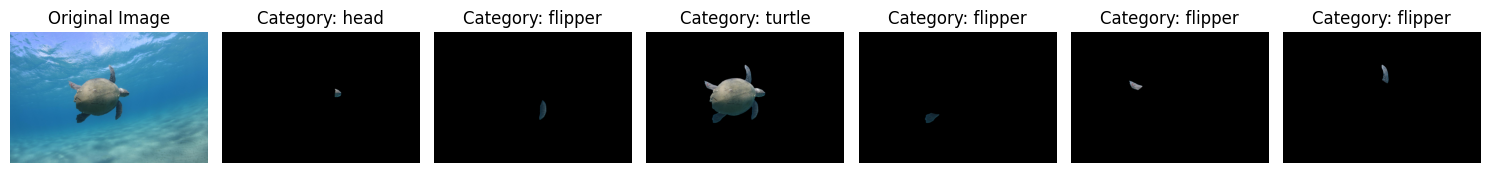

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from pycocotools.coco import COCO

# Define file paths
annotations_file = '/kaggle/input/seaturtleid2022/turtles-data/data/annotations.json'
image_base_dir = '/kaggle/input/seaturtleid2022/turtles-data/data/'

# Initialize COCO API
coco = COCO(annotations_file)

# Set the image ID you want to visualize
image_id = 7  # Change this to the ID of the image you want to visualize
img = coco.loadImgs(image_id)[0]

# Load and display the original image
image_path = os.path.join(image_base_dir, img['file_name'])
image = np.array(Image.open(image_path))

# Retrieve all annotation IDs for the given image
cat_ids = coco.getCatIds()
anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
anns = coco.loadAnns(anns_ids)

# Plot the original image
fig, axs = plt.subplots(1, len(anns) + 1, figsize=(15, 5))
axs[0].imshow(image)
axs[0].set_title("Original Image")
axs[0].axis("off")

# Loop over each annotation and visualize it separately
for i, ann in enumerate(anns):
    # Generate the binary mask for the current annotation
    mask = coco.annToMask(ann)
    
    # Create a copy of the original image and apply the mask
    masked_image = image.copy()
    masked_image[mask == 0] = 0  # Set all non-annotation areas to black

    # Display each annotated region with the corresponding category name
    axs[i + 1].imshow(masked_image)
    category_name = coco.loadCats(ann['category_id'])[0]['name']
    axs[i + 1].set_title(f"Category: {category_name}")
    axs[i + 1].axis("off")

plt.tight_layout()
plt.show()

Load and split the data using metadata csv

In [9]:
import pandas as pd
import os

# Load the metadata_splits.csv file
metadata_file = '/kaggle/input/seaturtleid2022/turtles-data/data/metadata_splits.csv'
metadata_df = pd.read_csv(metadata_file)

# Step 2: Pick split column
split_column = 'split_open'

# Step 3: Create the train, valid, and test splits based on the selected split column
train_df = metadata_df[metadata_df[split_column] == 'train']
valid_df = metadata_df[metadata_df[split_column] == 'valid']
test_df = metadata_df[metadata_df[split_column] == 'test']

# Filter each split to include only images that have annotations
train_image_paths = [img for img in train_df['file_name'] if img in annotations_dict]
valid_image_paths = [img for img in valid_df['file_name'] if img in annotations_dict]
test_image_paths = [img for img in test_df['file_name'] if img in annotations_dict]

# Create filtered annotation dictionaries for each split, keeping the list of annotations
train_annotations = {k: annotations_dict[k] for k in train_image_paths if k in annotations_dict}
valid_annotations = {k: annotations_dict[k] for k in valid_image_paths if k in annotations_dict}
test_annotations = {k: annotations_dict[k] for k in test_image_paths if k in annotations_dict}

# Count the total number of annotations in each split
train_annotation_count = sum(len(ann_list) for ann_list in train_annotations.values())
valid_annotation_count = sum(len(ann_list) for ann_list in valid_annotations.values())
test_annotation_count = sum(len(ann_list) for ann_list in test_annotations.values())

# Print the split summary
print(f"Training set contains {len(train_annotations)} images and {train_annotation_count} annotations.")
print(f"Validation set contains {len(valid_annotations)} images and {valid_annotation_count} annotations.")
print(f"Test set contains {len(test_annotations)} images and {test_annotation_count} annotations.")

print(f"Total images in metadata: {len(metadata_df)}")

Training set contains 5302 images and 23304 annotations.
Validation set contains 1118 images and 4935 annotations.
Test set contains 2306 images and 10175 annotations.
Total images in metadata: 8729


Create custom dataset class

In [10]:
from PIL import Image
import torch
from torch.utils.data import Dataset
import torchvision.transforms as transforms
import pycocotools.mask as maskUtils
import numpy as np
import os

class TurtleSegmentationDataset(Dataset):
    def __init__(self, image_paths, annotations_dict, transform=None, image_size=(256, 256), base_dir='/kaggle/input/seaturtleid2022/turtles-data/data/'):
        self.transform = transform
        self.image_size = image_size
        self.base_dir = base_dir
        self.image_paths = []
        self.annotations = []

        # Collect paths and annotations
        for img_path in image_paths:
            if img_path in annotations_dict and os.path.isfile(os.path.join(self.base_dir, img_path)):
                self.image_paths.append(img_path)
                self.annotations.append(annotations_dict[img_path])
            else:
                print(f"Annotation not found for image: {img_path}")

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        full_path = os.path.join(self.base_dir, img_path)
        image = Image.open(full_path).convert("RGB").resize(self.image_size)

        # Initialize masks for each category
        mask_head = np.zeros((self.image_size[0], self.image_size[1]), dtype=np.uint8)
        mask_flippers = np.zeros((self.image_size[0], self.image_size[1]), dtype=np.uint8)
        mask_turtle = np.zeros((self.image_size[0], self.image_size[1]), dtype=np.uint8)

        # Apply each annotation's mask to the correct category-specific mask
        for annotation in self.annotations[idx]:
            category_id = annotation['category_id']
            segmentation = annotation['segmentation']

            # Check if segmentation is in uncompressed RLE format
            if isinstance(segmentation, dict) and 'counts' in segmentation and isinstance(segmentation['counts'], list):
                # Convert uncompressed RLE to compressed RLE
                rle = maskUtils.frPyObjects([segmentation], *segmentation['size'])[0]
            else:
                rle = segmentation  # Already in compressed format

            # Decode the segmentation mask (RLE encoded)
            rle_mask = maskUtils.decode(rle)
            rle_mask_resized = np.array(Image.fromarray(rle_mask).resize(self.image_size, Image.NEAREST))

            # Assign each category to its respective mask
            if category_id == 1:  # Turtle body
                mask_turtle[rle_mask_resized == 1] = 1
            elif category_id == 2:  # Flippers
                mask_flippers[rle_mask_resized == 1] = 2
            elif category_id == 3:  # Head
                mask_head[rle_mask_resized == 1] = 3

        # Combine masks: head and flippers take precedence over the turtle body
        mask = np.maximum(mask_turtle, mask_flippers)  # Ensure flippers overlay body
        mask = np.maximum(mask, mask_head)  # Ensure head overlays both body and flippers

        # Convert image and mask to tensors
        image = transforms.ToTensor()(image)
        mask = torch.from_numpy(mask).long()  # Use long for CrossEntropyLoss

        if self.transform:
            image = self.transform(image)

        return image, mask

Define UNet model

In [11]:
import segmentation_models_pytorch as smp
import torch.optim as optim
import torch.nn as nn

# Define the U-Net model with a pre-trained ResNet34 backbone
model = smp.Unet(
    encoder_name="resnet34",
    encoder_weights="imagenet",     # Use ImageNet pre-trained weights
    in_channels=3,                  # Input channels (RGB)
    classes=4,                      # Output classes (background, head, body, flippers)
    activation=None           # No softmax applied here; handled by CrossEntropyLoss
)


# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

# Print model summary (optional)
print(model)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 213MB/s]


Unet(
  (encoder): ResNetEncoder(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

Lets observe an image-mask pair to make sure that the body has been successfully separated from the head and flippers.

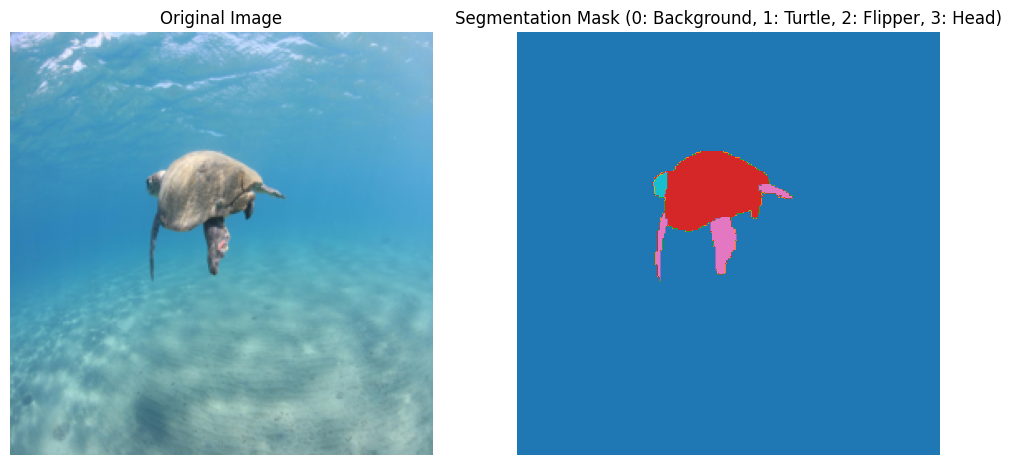

In [12]:
# Create train dataset and take first element out of it
train_dataset = TurtleSegmentationDataset(train_image_paths, train_annotations, image_size=(256, 256))

import matplotlib.pyplot as plt
import numpy as np
import torch
from PIL import Image

# Choose an index to visualize
index = 0  # Change this to visualize a different image-mask pair

# Load the image and mask from the dataset
image, mask = train_dataset[index]  # Assuming train_dataset is already initialized as TurtleSegmentationDataset

# Convert the image tensor back to a numpy array for visualization
image_np = image.permute(1, 2, 0).cpu().numpy()  # Convert CxHxW to HxWxC for plotting
mask_np = mask.cpu().numpy()  # Convert mask tensor to numpy

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(image_np)
axs[0].set_title("Original Image")
axs[0].axis("off")

# Visualize the mask by using a color map (cmap) for clarity
axs[1].imshow(mask_np, cmap="tab10", vmin=0, vmax=3)  # Use discrete colors for classes
axs[1].set_title("Segmentation Mask (0: Background, 1: Turtle, 2: Flipper, 3: Head)")
axs[1].axis("off")

plt.show()

Now lets implement the training loop

In [13]:
from torch.utils.data import DataLoader
import torch
import time

# Create datasets
train_dataset = TurtleSegmentationDataset(train_image_paths, train_annotations, image_size=(256, 256))
valid_dataset = TurtleSegmentationDataset(valid_image_paths, valid_annotations, image_size=(256, 256))

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers = 2)
valid_loader = DataLoader(valid_dataset, batch_size=128, shuffle=False, num_workers = 2)

# Move model to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Training loop
num_epochs = 10  # Set the number of epochs
loss_history = []
criterion = nn.CrossEntropyLoss()
total_batches = len(train_loader)

for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    print(f'Starting epoch {epoch + 1} / {num_epochs}')

    # Training phase
    # Adjust the loss function


    for batch_idx, (images, masks) in enumerate(train_loader, 1):
        start_time = time.time()
        images = images.to(device)
        masks = masks.to(device)
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, masks)  # CrossEntropyLoss expects integer labels

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Accumulate training loss
        running_loss += loss.item() * images.size(0)

        # Print progress every 10 batches
        if batch_idx % 10 == 0:
          print(f"Batch {batch_idx}/{total_batches} - Loss: {loss.item():.4f} - Time: {time.time() - start_time:.2f}s")

    # Average loss over training data
    avg_training_loss = running_loss / len(train_loader.dataset)
    loss_history.append(avg_training_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Average Training Loss: {avg_training_loss:.4f}")

    # Validation phase
    model.eval()  # Set model to evaluation mode
    val_loss = 0.0
    with torch.no_grad():  # No need to track gradients during validation
        for images, masks in valid_loader:
            images = images.to(device)
            masks = masks.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, masks)

            val_loss += loss.item() * images.size(0)

    avg_val_loss = val_loss / len(valid_loader.dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}], Validation Loss: {avg_val_loss:.4f}")

Starting epoch 1 / 10
Batch 10/42 - Loss: 0.6282 - Time: 0.92s
Batch 20/42 - Loss: 0.3394 - Time: 0.92s
Batch 30/42 - Loss: 0.2174 - Time: 0.92s
Batch 40/42 - Loss: 0.1674 - Time: 0.92s
Epoch [1/10], Average Training Loss: 0.4605
Epoch [1/10], Validation Loss: 0.1729
Starting epoch 2 / 10
Batch 10/42 - Loss: 0.1207 - Time: 0.92s
Batch 20/42 - Loss: 0.1129 - Time: 0.92s
Batch 30/42 - Loss: 0.0910 - Time: 0.92s
Batch 40/42 - Loss: 0.0739 - Time: 0.93s
Epoch [2/10], Average Training Loss: 0.1111
Epoch [2/10], Validation Loss: 0.0980
Starting epoch 3 / 10
Batch 10/42 - Loss: 0.0666 - Time: 0.92s
Batch 20/42 - Loss: 0.0840 - Time: 0.92s
Batch 30/42 - Loss: 0.0687 - Time: 0.92s
Batch 40/42 - Loss: 0.0536 - Time: 0.92s
Epoch [3/10], Average Training Loss: 0.0671
Epoch [3/10], Validation Loss: 0.0615
Starting epoch 4 / 10
Batch 10/42 - Loss: 0.0457 - Time: 0.92s
Batch 20/42 - Loss: 0.0448 - Time: 0.92s
Batch 30/42 - Loss: 0.0478 - Time: 0.92s
Batch 40/42 - Loss: 0.0370 - Time: 0.92s
Epoch [4/1

Plot the loss over training epochs

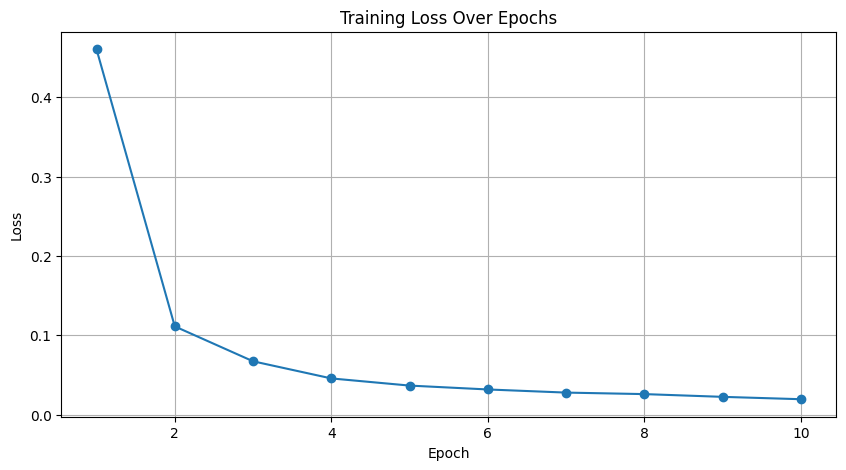

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), loss_history, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.grid(True)
plt.show()

Evaluate model on test set and plot a predicted mask.

Average Test Loss: 0.0307


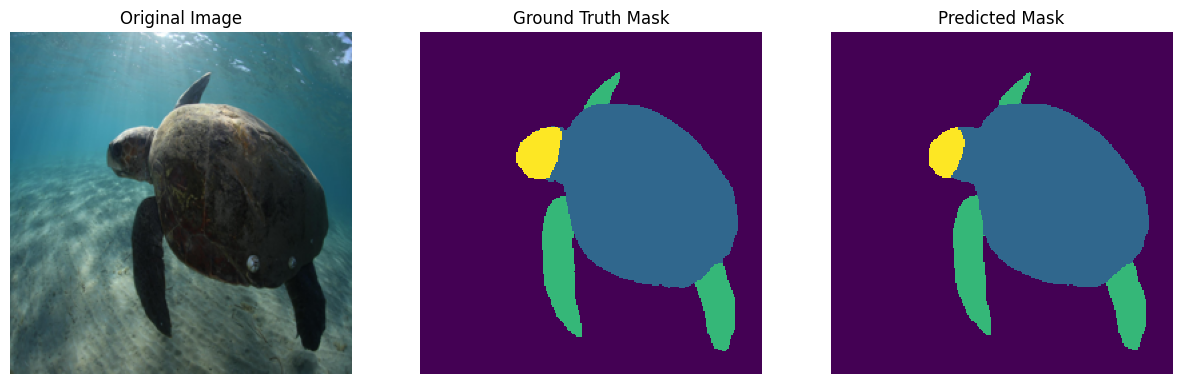

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import DataLoader
from sklearn.metrics import jaccard_score  # IoU for each class if desired

# Assuming you have defined the file paths and annotations for the test set
test_dataset = TurtleSegmentationDataset(test_image_paths, test_annotations, image_size=(256, 256))

# Set a higher batch size for faster evaluation (4 or 8 can be a good balance)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False, num_workers=2)

# Evaluation Function
def evaluate_model(model, test_loader, criterion, device):
    model.eval()  # Set model to evaluation mode
    total_loss = 0.0

    with torch.no_grad():
        for images, masks in test_loader:
            images = images.to(device)
            masks = masks.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, masks)
            total_loss += loss.item()

    avg_loss = total_loss / len(test_loader)
    print(f"Average Test Loss: {avg_loss:.4f}")

# Visualization Function
def visualize_predictions(model, dataset, index, device):
    model.eval()
    image, ground_truth = dataset[index]
    image = image.to(device).unsqueeze(0)  # Add batch dimension

    with torch.no_grad():
        output = model(image)
        predicted_mask = torch.argmax(output.squeeze(), dim=0).cpu().numpy()

    # Move ground truth to CPU for visualization
    ground_truth = ground_truth.cpu().numpy()

    # Plotting the results
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(image.squeeze().permute(1, 2, 0).cpu())  # Display the image
    axs[0].set_title("Original Image")
    axs[0].axis("off")

    axs[1].imshow(ground_truth, cmap="viridis", interpolation="nearest")
    axs[1].set_title("Ground Truth Mask")
    axs[1].axis("off")

    axs[2].imshow(predicted_mask, cmap="viridis", interpolation="nearest")
    axs[2].set_title("Predicted Mask")
    axs[2].axis("off")

    plt.show()

# Run evaluation
evaluate_model(model, test_loader, criterion, device)

# Visualize predictions
sample_index = 0  # Change this index to view different test samples
visualize_predictions(model, test_dataset, sample_index, device)

Print mIoU results

In [16]:
import torch
import numpy as np
from torch.utils.data import DataLoader

# Assuming your test dataset and model are already defined
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False, num_workers=2)

# Define class IDs
class_ids = [1, 2, 3]  # head=1, turtle=2, flippers=3

# Helper function to compute IoU for a specific class
def compute_iou(pred, target, class_id):
    pred_binary = (pred == class_id).astype(np.uint8)
    target_binary = (target == class_id).astype(np.uint8)
    intersection = np.logical_and(pred_binary, target_binary).sum()
    union = np.logical_or(pred_binary, target_binary).sum()
    return intersection / union if union != 0 else 0

# Evaluation function to calculate mIoU
def evaluate_miou(model, test_loader, device):
    model.eval()
    # Dictionaries to accumulate IoU sums and counts for each class
    iou_sums = {class_id: 0 for class_id in class_ids}
    iou_counts = {class_id: 0 for class_id in class_ids}
    
    with torch.no_grad():
        for images, masks in test_loader:
            images = images.to(device)
            outputs = model(images)
            
            # Iterate over each sample in the batch
            for i in range(len(outputs)):
                pred_mask = torch.argmax(outputs[i], dim=0).cpu().numpy()  # Get predicted mask for this sample
                target_mask = masks[i].cpu().numpy()  # Get target mask for this sample
                
                # Calculate IoU for each class
                for class_id in class_ids:
                    iou = compute_iou(pred_mask, target_mask, class_id)
                    if iou > 0:  # Avoid counting classes not present in this image
                        iou_sums[class_id] += iou
                        iou_counts[class_id] += 1

    # Calculate mean IoU for each class
    iou_results = {class_id: (iou_sums[class_id] / iou_counts[class_id]) if iou_counts[class_id] > 0 else 0 for class_id in class_ids}
    
    # Print IoU for each class and overall mean IoU
    print("\nIntersection over Union (IoU):")
    class_names = ["head", "turtle", "flippers"]
    for class_id, class_name in zip(class_ids, class_names):
        print(f"IoU for {class_name}: {iou_results[class_id]:.3f}")
    
    # Calculate overall mIoU (mean of class-wise IoUs)
    overall_miou = np.mean(list(iou_results.values()))
    print(f"Overall mean IoU (mIoU): {overall_miou:.3f}")

# Call the evaluation function
evaluate_miou(model, test_loader, device)


Intersection over Union (IoU):
IoU for head: 0.895
IoU for turtle: 0.770
IoU for flippers: 0.790
Overall mean IoU (mIoU): 0.818
